In [1]:
import pandas as pd
import pandasql as ps
import numpy as np

## Load Dataframe

In [2]:
# Open dataframe

one_piece_imdb_df = pd.read_csv("one_piece_imdb.csv")

In [3]:
one_piece_imdb_df.head(10)

,Unnamed: 0,ratings,review_titles,reviews,review_dates,source
0,0,9.0,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,"Sep 4, 2023",IMDb.com
1,1,8.0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,"Sep 4, 2023",IMDb.com
2,2,9.0,The live action curse breaker,Despite the negative reviews from some people ...,"Aug 31, 2023",IMDb.com
3,3,10.0,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...","Aug 31, 2023",IMDb.com
4,4,NaN,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,"Sep 1, 2023",IMDb.com
5,5,10.0,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,"Sep 4, 2023",IMDb.com
6,6,9.0,"Not an anime fan, but this a fun adventure!",My kids play and watch One Piece anime and lov...,"Sep 4, 2023",IMDb.com
7,7,10.0,Wow! Just Big Wow!!,GREAT ADAPTATION! As an old-school fan (since ...,"Aug 31, 2023",IMDb.com
8,8,8.0,Already looking forward to next season,One Piece has definitely lived up to all the h...,"Sep 16, 2023",IMDb.com
9,9,9.0,"Campy, silly, and so much fun",I've never watched the anime or read the manga...,"Sep 2, 2023",IMDb.com


## Data Cleaning

### I. Checking Data

In [4]:
# Before checking data, get rid of 'Unnamed: 0' column

one_piece_imdb_df.drop("Unnamed: 0", axis=1)

,ratings,review_titles,reviews,review_dates,source
0,9.0,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,"Sep 4, 2023",IMDb.com
1,8.0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,"Sep 4, 2023",IMDb.com
2,9.0,The live action curse breaker,Despite the negative reviews from some people ...,"Aug 31, 2023",IMDb.com
3,10.0,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...","Aug 31, 2023",IMDb.com
4,NaN,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,"Sep 1, 2023",IMDb.com
...,...,...,...,...,...
1051,3.0,Only good thing about it is it's nice interdic...,"They cut off so many legendary scenes like ""gu...","Oct 20, 2025",IMDb.com
1052,5.0,Don't invest because Netflix cancel,"After eight fantastically creative episodes, N...","Dec 7, 2023",IMDb.com
1053,4.0,nahh too violent,If u plan to watch this with your kids forget ...,"Nov 18, 2023",IMDb.com
1054,5.0,Never saw the original. Sooo....,It's great that fans of the anime get the show...,"Sep 28, 2023",IMDb.com


In [5]:
# Check duplicated values

duplicated_rows = one_piece_imdb_df[one_piece_imdb_df.duplicated(keep=False)]

print(duplicated_rows)

Empty DataFrame
Columns: [Unnamed: 0, ratings, review_titles, reviews, review_dates, source]
Index: []


In [6]:
# Check empty values in each column

def empty_column_finder(df):
    column_list = df.columns
    for c in column_list:
        missing = df[c].isnull().sum()
        print(f"The column, {c}, has {missing} missing values.")


In [7]:
empty_column_finder(one_piece_imdb_df)

The column, Unnamed: 0, has 0 missing values.
The column, ratings, has 11 missing values.
The column, review_titles, has 0 missing values.
The column, reviews, has 0 missing values.
The column, review_dates, has 0 missing values.
The column, source, has 0 missing values.


In [8]:
# We have 11 missing values on ratings. Let's check the review titles and reviews first before moving on

empty_rating_df_check = one_piece_imdb_df[one_piece_imdb_df['ratings'].isna()]

In [9]:
empty_rating_df_check[['ratings', 'review_titles', 'reviews']]

,ratings,review_titles,reviews
4,NaN,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...
68,NaN,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...
227,NaN,another Netflix Failure,"The Netflix live adaptation of ""One Piece"" fee..."
237,NaN,A must watch,If you browse there are series with more actio...
298,NaN,Emily Rudd's hair as Nami,Everything went so right with casting and thei...
309,NaN,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe..."
416,NaN,Great adaptation!,One Piece somehow managed to pull it off: a le...
437,NaN,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...
448,NaN,"Has its flaws, but still a lot of fun!","As a fan of the anime, I was a little sceptica..."
461,NaN,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...


### II. VADER for Checking Sentiment & Preparing for KNN

In [10]:
# Most of reviews without ratings seem positive
# Since not all reviews are shown, we use VADER to assess sentiment across the full dataset

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_vader = SentimentIntensityAnalyzer()

one_piece_imdb_df['vader_score_title'] = one_piece_imdb_df['review_titles'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])
one_piece_imdb_df['vader_score_review'] = one_piece_imdb_df['reviews'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])

In [11]:
def sentiment_category_vader(sentiment):
        if sentiment >= 0.05:
            return "Positive"
        elif sentiment <= -0.05:
            return "Negative"
        else:
            return "Neutral"
        
one_piece_imdb_df['vader_sentiment_title'] = one_piece_imdb_df['vader_score_title'].apply(sentiment_category_vader)
one_piece_imdb_df['vader_sentiment_review'] = one_piece_imdb_df['vader_score_review'].apply(sentiment_category_vader)

In [12]:
one_piece_imdb_df.head(3)

,Unnamed: 0,ratings,review_titles,reviews,review_dates,source,vader_score_title,vader_score_review,vader_sentiment_title,vader_sentiment_review
0,0,9.0,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,"Sep 4, 2023",IMDb.com,0.7469,0.9941,Positive,Positive
1,1,8.0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,"Sep 4, 2023",IMDb.com,0.5106,0.9200,Positive,Positive
2,2,9.0,The live action curse breaker,Despite the negative reviews from some people ...,"Aug 31, 2023",IMDb.com,-0.5423,0.9806,Negative,Positive


### III. KNN for Estimating More Accurate Ratings for Missing Values 

Displaying only columns with missing values.
Unnamed: 0                 0
ratings                   11
review_titles              0
reviews                    0
review_dates               0
source                     0
vader_score_title          0
vader_score_review         0
vader_sentiment_title      0
vader_sentiment_review     0
dtype: int64


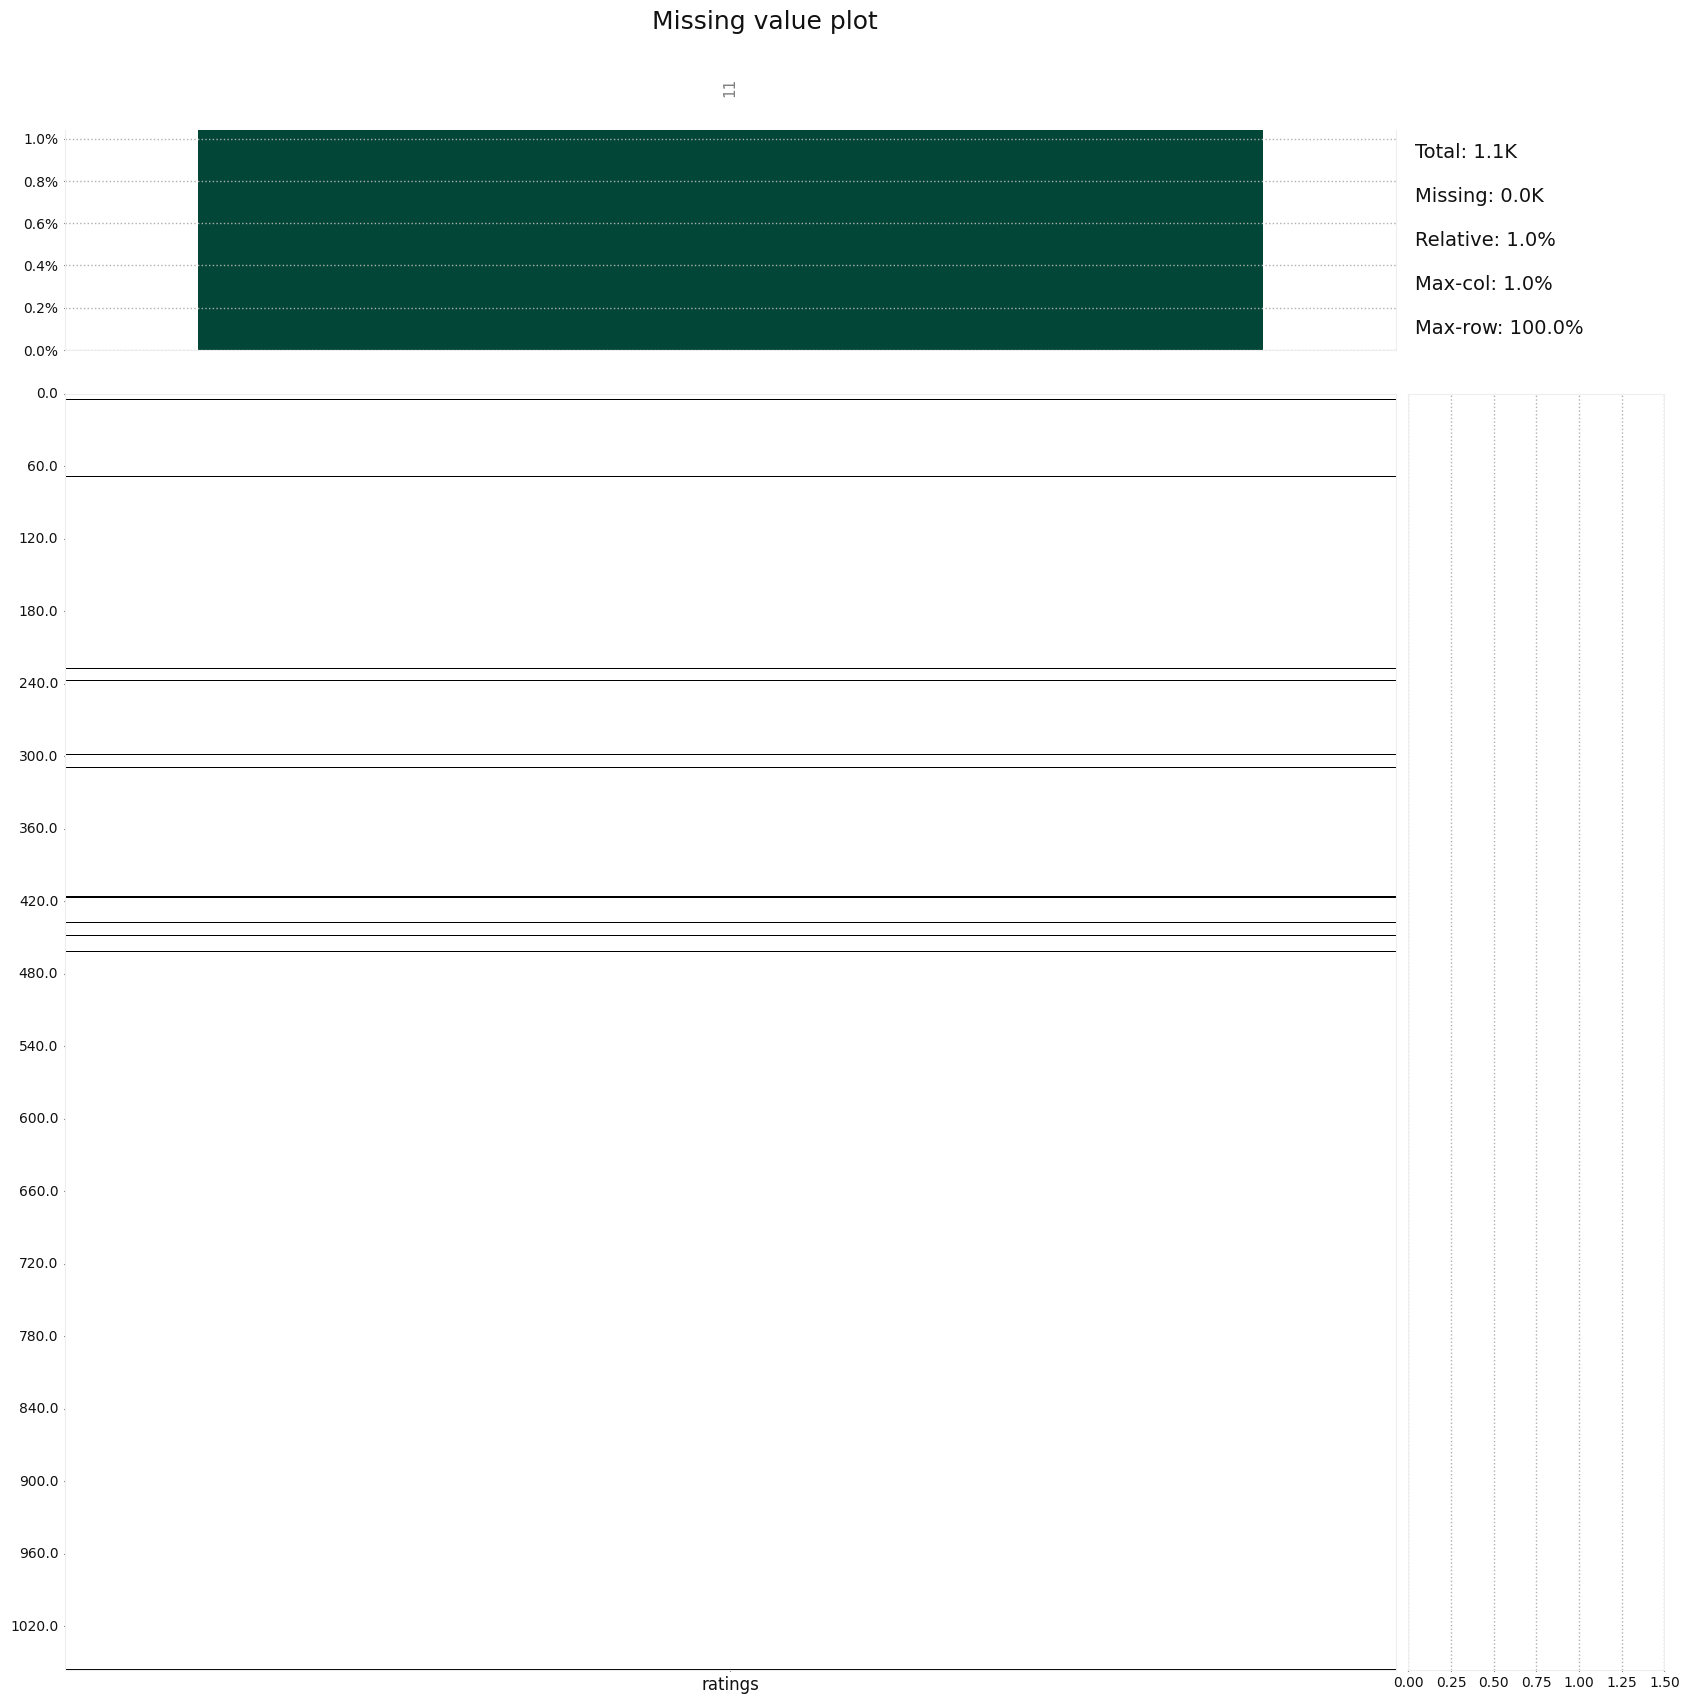

In [13]:
# All of VADER scores are filled
# Let's check the relationship between ratings, vader_score_title, and vader_score_review

import klib
import warnings

# Ignoring warnings
warnings.filterwarnings(action='ignore') 

# Check NA values
klib.missingval_plot(one_piece_imdb_df, sort=True)

print(one_piece_imdb_df.isnull().sum(axis=0))



<Axes: xlabel='vader_score_review', ylabel='Density'>

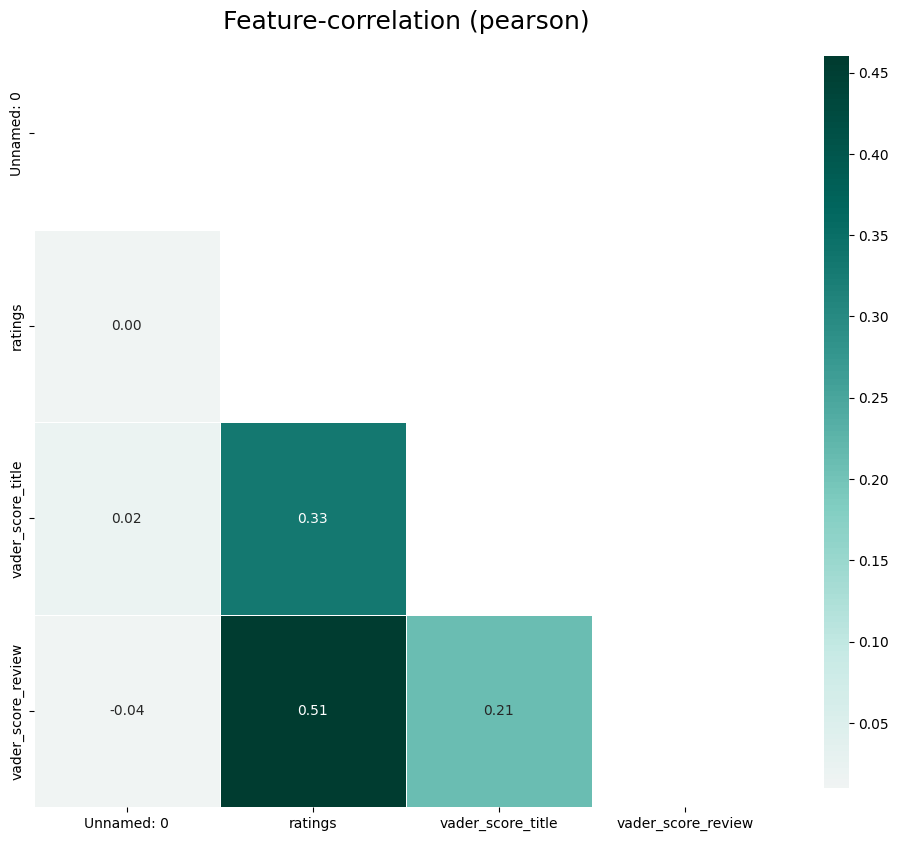

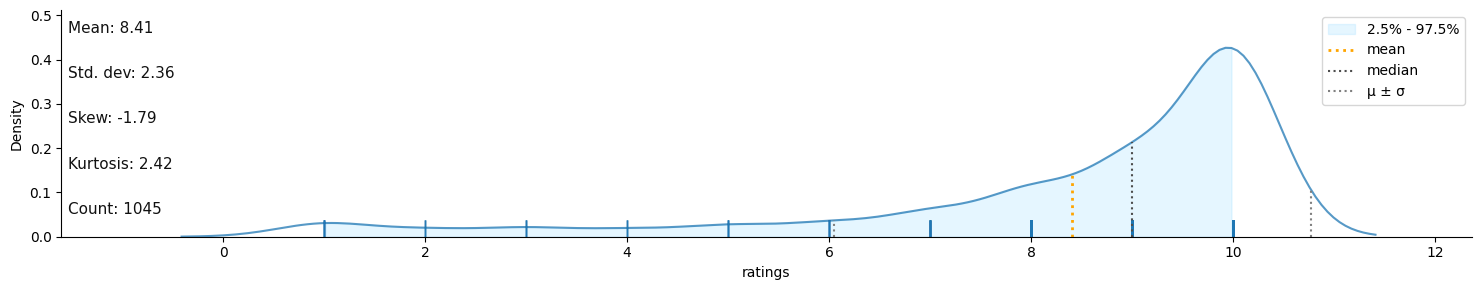

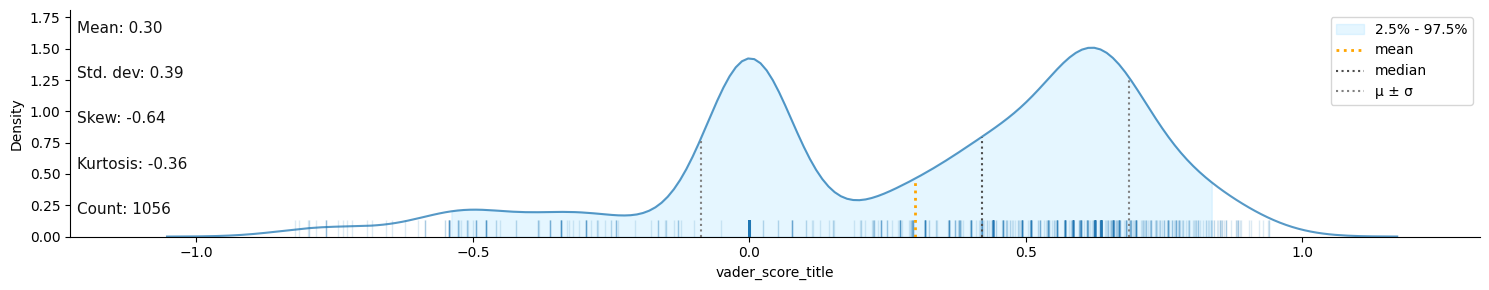

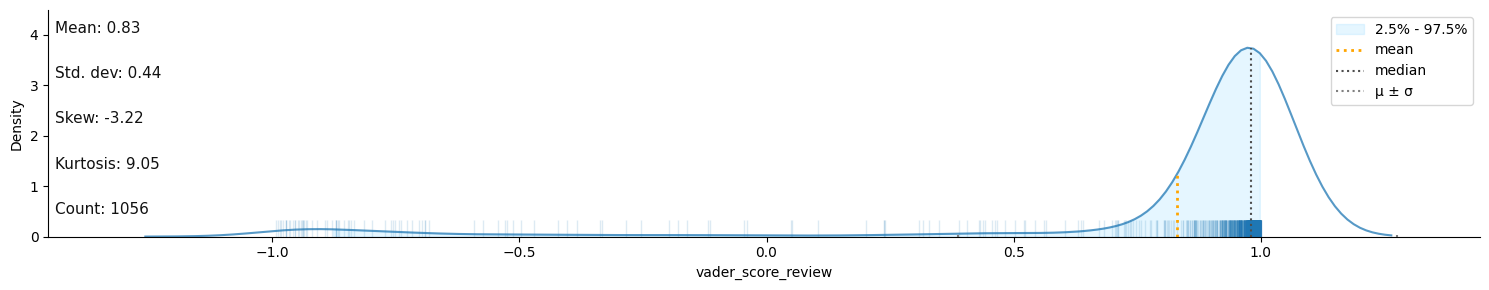

In [14]:
# Check Relationships

klib.corr_plot(one_piece_imdb_df) 

klib.dist_plot(one_piece_imdb_df.ratings)
klib.dist_plot(one_piece_imdb_df.vader_score_title)
klib.dist_plot(one_piece_imdb_df.vader_score_review)

In [15]:
# The missing ratings have significant relationship with VADER ratings on titles and reviews.
# Need to fill those ratings with KNN method for more accurate prediction.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

# Create separate dataframe for KNN method

rating_vader_df = pd.DataFrame(one_piece_imdb_df, columns=['ratings', 'vader_score_title', 'vader_score_review'])

imputer_vader = KNNImputer(n_neighbors=2)

rating_vader_filled = imputer_vader.fit_transform(rating_vader_df)

Imputed_rating_vader = pd.DataFrame(rating_vader_filled, columns=rating_vader_df.columns)
Imputed_rating_vader.columns = ['ratings', 'vader_score_title', 'vader_score_review']

# Let's fill up the calculated values

one_piece_imdb_df['ratings'] = np.where(one_piece_imdb_df['ratings'].isnull(), Imputed_rating_vader['ratings'], one_piece_imdb_df['ratings'])


In [16]:
# The empty ratings are finally filled

one_piece_imdb_df['ratings'].unique()

array([ 9. ,  8. , 10. ,  6. ,  3. ,  7. ,  4. ,  5. ,  1. ,  2. ,  5.5,
        9.5])

### IV. Last Step for Data Cleaning

In [17]:
# Also, need to change date to yyyy-mm-dd format

import time

one_piece_imdb_df['review_dates'] = pd.to_datetime(one_piece_imdb_df['review_dates']).dt.strftime('%Y-%m-%d')

In [18]:
# Since all the values are filled up, let's organize dataframe by using SQL

one_piece_imdb_df_final = ps.sqldf("select [review_dates], [ratings], [review_titles], [reviews], [vader_score_title], [vader_score_review], [vader_sentiment_title], [vader_sentiment_review], [source] from one_piece_imdb_df")

## Finalizing Data Cleaning Process & End

In [19]:
one_piece_imdb_df_final.to_csv('one_piece_imdb_df_cleaned.csv', index=False)